In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [46]:
df = pd.read_csv("car data.csv")

In [47]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# EDA

In [49]:
# missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [50]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [51]:
# basic statistics
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [52]:
# data preprocessing
df = pd.get_dummies(df,drop_first=True)

In [53]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)

In [54]:
# split the dataset into features(x) and target variables(y)
x= df.drop(['Selling_Price'],axis=1)
y= df['Selling_Price']

In [55]:
# split the dataset in training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random forest Regressor

In [56]:
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [57]:
# train the model
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [58]:
# making prediction
y_pred = model.predict(x_test)

In [59]:
# calculating performance metrics
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute error : {mae}")
print(f"Mean Swuared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute error : 0.5907950819672131
Mean Swuared Error: 0.7524023742622952
R2 Score: 0.9673373873539192


In [60]:
# Defining the number of top features to display
N=10
# Sorting features by importance
importances = model.feature_importances_
feature_names=x.columns
sorted_indices = np.argsort(importances)[-N:] #getting indices of the top N features

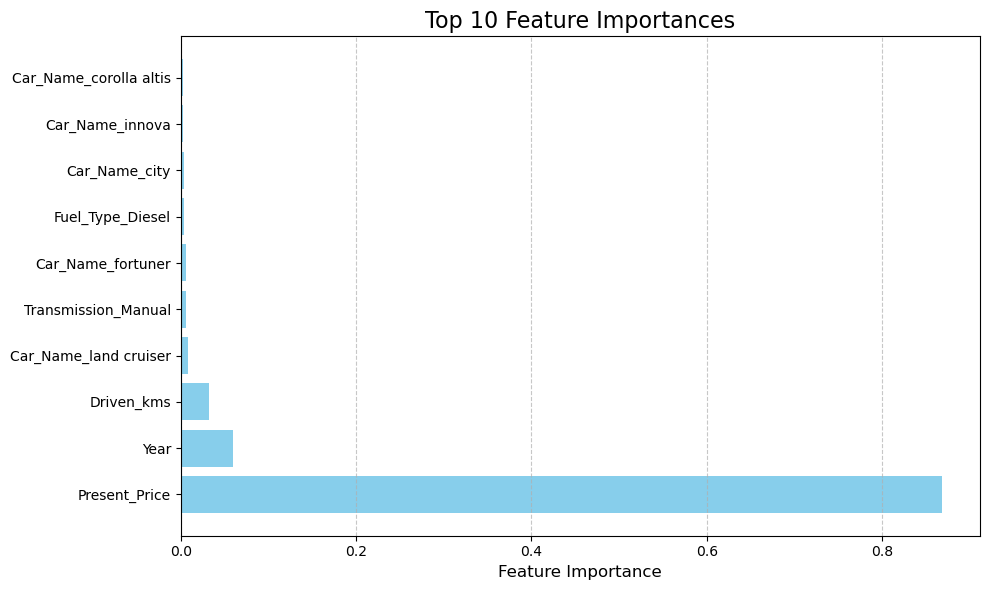

In [61]:
# Ensure that N is less than or equal to the number of features
N = min(N, len(importances))

# Sort the indices based on importances
sorted_indices = np.argsort(importances)[::-1]

# Plotting the top N feature importances
plt.figure(figsize=(10,6))
plt.barh(range(N), importances[sorted_indices][:N], color='skyblue', align='center')
plt.yticks(range(N), np.array(feature_names)[sorted_indices][:N])
plt.xlabel('Feature Importance', fontsize=12)
plt.title(f'Top {N} Feature Importances', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
# Assuming 'present_price' and 'kms_Driven' are features in your dataset
# and we want to predict the price for a car with present_price = 10 and kms_Driven = 50000
new_data = pd.DataFrame({'Present_Price':[10],'kms_Driven':[50000],'Year':[2023],'Fuel_Type_Diesel':[0],
                        'Fuel_Type_Petrol':[1],'Seller_Type_Individual':[0],
                        'Transmission_Manual':[1],'Owner':[0],})

In [63]:
new_data = new_data.reindex(columns=x_train.columns ,fill_value=0)

In [64]:
predicted_price = model.predict(new_data)
print(f"predicted price: {predicted_price[0]}")

predicted price: 7.820299999999999
